A notebook to extract the data along the Seal Island transect.

Data CMEMS global 1/12 degree analysis (CMEMS name: global-analysis-forecast-phy-001-024) on July 25, 2020 is compared to a July 1993-2018 climatology derived from GLORYS12 (CMEMS name: GLOBAL_REANALYSIS_PHY_001_030).

GLORYS12 climatology data is available from the Ocean Navigator team (speak to Vanessa Sutton-Pande).

In [1]:
import geopy.distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
stations = pd.read_table('sealisland.txt', delimiter=' ')
stations

,STATION,LAT,LON
0,SI-01,53.233,-55.650
1,SI-02,53.333,-55.500
2,SI-03,53.410,-55.357
3,SI-04,53.533,-55.145
4,SI-05,53.617,-55.000
5,SI-06,53.757,-54.777
6,SI-07,53.917,-54.500
7,SI-08,54.082,-54.217
8,SI-09,54.200,-54.000
9,SI-10,54.355,-53.733


In [3]:
d = xr.open_dataset('global-analysis-forecast-phy-001-024_1610112405187.nc')
d

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 37, longitude: 49, time: 1)
Coordinates:
  * latitude   (latitude) float32 53.0 53.083332 53.166668 ... 55.916668 56.0
  * depth      (depth) float32 0.494025 1.541375 2.645669 ... 5274.784 5727.917
  * time       (time) datetime64[ns] 2020-07-25T12:00:00
  * longitude  (longitude) float32 -56.0 -55.916668 ... -52.083332 -52.0
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    siconc     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    usi        (time, latitude, longitude) float32 ...
    sithick    (time, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
    vsi        (time, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    zos        (time, l

In [4]:
dclim = xr.open_dataset('/home/soontiensn/data/cmems2020-oceanstatereport/mercatorglorys12v1_gl12_mean_07_199301-201812.nc')
dclim = dclim.sel(latitude=slice(d.latitude.min(), d.latitude.max()), longitude=slice(d.longitude.min(), d.longitude.max()))

In [5]:
dclim

<xarray.Dataset>
Dimensions:             (depth: 50, latitude: 37, longitude: 49, nv: 2, time: 1)
Coordinates:
  * depth               (depth) float32 0.494025 1.541375 ... 5274.784 5727.917
  * latitude            (latitude) float32 53.0 53.083332 ... 55.916668 56.0
  * longitude           (longitude) float32 -56.0 -55.916668 ... -52.0
  * time                (time) datetime64[ns] 1993-07-16
Dimensions without coordinates: nv
Data variables:
    bottomT             (time, latitude, longitude) float64 ...
    mlotst              (time, latitude, longitude) float64 ...
    siconc              (time, latitude, longitude) float64 ...
    sithick             (time, latitude, longitude) float64 ...
    so                  (time, depth, latitude, longitude) float64 ...
    thetao              (time, depth, latitude, longitude) float64 ...
    uo                  (time, depth, latitude, longitude) float64 ...
    usi                 (time, latitude, longitude) float64 ...
    vo              

In [6]:
drop=['mlotst', 'siconc', 'usi','bottomT', 'vsi', 'zos', 'sithick']

In [7]:
dnew = pd.DataFrame()
numrows=stations.shape[0]
numdepths=d.depth.values.shape[0]
temp=np.empty((numdepths, numrows))
sal = np.empty((numdepths, numrows))
temp_clim=np.empty((numdepths, numrows))
sal_clim = np.empty((numdepths, numrows))
dnew_clim = pd.DataFrame()
for i in range(stations.shape[0]):
    print(i)
    lat=stations.iloc[i]['LAT']
    lon=stations.iloc[i]['LON']
    sid=stations.iloc[i]['STATION']
    dstation = d.interp(latitude=lat, longitude=lon)
    dstation = dstation.drop(drop)
    df=dstation.to_dataframe()
    df['station'] = sid
    df = df.reset_index()
    dnew = pd.concat([dnew,df])
    temp[:, i] = np.squeeze(dstation.thetao.values)
    sal[:, i] = np.squeeze(dstation.so.values)
    # Climatology
    print('processing clim')
    dstation_clim = dclim.interp(latitude=lat, longitude=lon)
    dstation_clim = dstation_clim.drop(drop)
    df_clim=dstation_clim.to_dataframe()
    df_clim['station'] = sid
    df_clim = df_clim.reset_index()
    dnew_clim = pd.concat([dnew_clim,df_clim])
    temp_clim[:, i] = np.squeeze(dstation_clim.thetao.values)
    sal_clim[:, i] = np.squeeze(dstation_clim.so.values)

0
processing clim
1
processing clim
2
processing clim
3
processing clim
4
processing clim
5
processing clim
6
processing clim
7
processing clim
8
processing clim
9
processing clim
10
processing clim
11
processing clim
12
processing clim
13
processing clim


In [8]:
rename={var: '{} [{}]'.format(d[var].attrs['long_name'], d[var].attrs['units'])
        for var in dnew.columns if var not in ['station', 'time']}
rename['station'] = 'STATION'
rename['time'] = 'TIME'
rename['longitude'] = 'LON'
rename['latitude'] = 'LAT'

In [9]:
dnew = dnew.rename(columns=rename)
dnew = dnew.reset_index(drop=True)
dnew

,Depth [m],TIME,Temperature [degrees_C],Northward velocity [m s-1],Eastward velocity [m s-1],Salinity [1e-3],LAT,LON,STATION
0,0.494025,2020-07-25 12:00:00,9.331520,-0.349346,0.082295,29.615211,53.233,-55.65,SI-01
1,1.541375,2020-07-25 12:00:00,9.151456,-0.359278,0.082098,29.632414,53.233,-55.65,SI-01
2,2.645669,2020-07-25 12:00:00,8.324164,-0.383035,0.073408,29.704880,53.233,-55.65,SI-01
3,3.819495,2020-07-25 12:00:00,7.310033,-0.401451,0.055687,29.808921,53.233,-55.65,SI-01
4,5.078224,2020-07-25 12:00:00,6.444636,-0.408145,0.035361,29.916508,53.233,-55.65,SI-01
...,...,...,...,...,...,...,...,...,...
695,3992.483887,2020-07-25 12:00:00,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14
696,4405.224121,2020-07-25 12:00:00,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14
697,4833.291016,2020-07-25 12:00:00,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14
698,5274.784180,2020-07-25 12:00:00,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14


In [10]:
dnew_clim = dnew_clim.rename(columns=rename)
dnew_clim = dnew_clim.reset_index(drop=True)
dnew_clim = dnew_clim.drop(columns=['TIME','climatology_bounds', 'nv'])
dnew_clim

,Depth [m],Salinity [1e-3],Temperature [degrees_C],Eastward velocity [m s-1],Northward velocity [m s-1],LAT,LON,STATION
0,0.494025,29.860453,7.112157,0.038932,-0.240717,53.233,-55.65,SI-01
1,0.494025,29.860453,7.112157,0.038932,-0.240717,53.233,-55.65,SI-01
2,1.541375,29.872228,6.985210,0.037891,-0.242967,53.233,-55.65,SI-01
3,1.541375,29.872228,6.985210,0.037891,-0.242967,53.233,-55.65,SI-01
4,2.645669,29.899034,6.783438,0.035618,-0.245653,53.233,-55.65,SI-01
...,...,...,...,...,...,...,...,...
1395,4833.291016,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14
1396,5274.784180,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14
1397,5274.784180,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14
1398,5727.916992,NaN,NaN,NaN,NaN,55.067,-52.50,SI-14


In [11]:
dnew_clim.to_csv('SealIsland_JulyClimatology_mercatorglorys12v1_gl12_mean_07_199301-201812.csv', index=False, na_rep='nan')

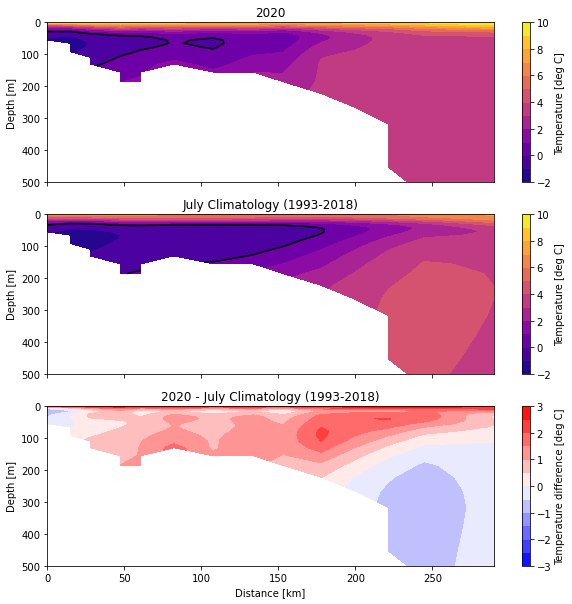

In [12]:
fig, axs= plt.subplots(3,1, figsize=(10,10), sharex=True)
distance = [geopy.distance.distance((stations.iloc[0]['LAT'], stations.iloc[0]['LON']),
                                    (stations.iloc[i]['LAT'], stations.iloc[i]['LON'])).km for i in range(numrows)]
depths, dist = np.meshgrid(d.depth.values, distance)
# 2020
ax=axs[0]
mesh=ax.contourf(dist, depths,temp.T,cmap='plasma',levels=np.arange(-2, 11,1))
ax.contour(dist, depths,temp.T,[0],colors='k')
ax.set_ylim([500,0])
cbar=plt.colorbar(mesh,ax=ax)
ax.set_ylabel('Depth [m]')
cbar.set_label('Temperature [deg C]')
ax.set_title('2020')
# Clim
ax=axs[1]
mesh=ax.contourf(dist, depths,temp_clim.T,cmap='plasma',levels=np.arange(-2, 11,1))
ax.contour(dist, depths,temp_clim.T,[0],colors='k')
ax.set_ylim([500,0])
cbar=plt.colorbar(mesh,ax=ax)
ax.set_ylabel('Depth [m]')
cbar.set_label('Temperature [deg C]')
ax.set_title('July Climatology (1993-2018)')
# Differentce
ax=axs[2]
mesh=ax.contourf(dist, depths, temp.T - temp_clim.T,cmap='bwr',levels=np.arange(-3, 3.5,0.5))
ax.set_ylim([500,0])
cbar=plt.colorbar(mesh,ax=ax)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Distance [km]')
cbar.set_label('Temperature difference [deg C]')
ax.set_title('2020 - July Climatology (1993-2018)')
fig.savefig('SealIsland_CMEMS_TemperatureClimatologyComparison.png', bbox_inches='tight')

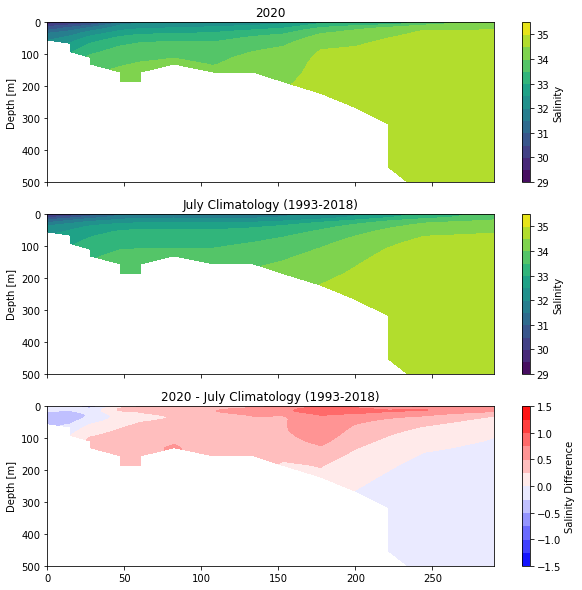

In [13]:
fig, axs= plt.subplots(3,1, figsize=(10,10), sharex=True)
distance = [geopy.distance.distance((stations.iloc[0]['LAT'], stations.iloc[0]['LON']),
                                    (stations.iloc[i]['LAT'], stations.iloc[i]['LON'])).km for i in range(numrows)]
depths, dist = np.meshgrid(d.depth.values, distance)
ax=axs[0]
mesh=ax.contourf(dist, depths,sal.T,cmap='viridis',levels=np.arange(29, 36,0.5))
ax.set_ylim([500,0])
cbar=plt.colorbar(mesh, ax=ax)
ax.set_ylabel('Depth [m]')
cbar.set_label('Salinity')
ax.set_title('2020')
ax=axs[1]
mesh=ax.contourf(dist, depths,sal_clim.T,cmap='viridis',levels=np.arange(29, 36,0.5))
ax.set_ylim([500,0])
cbar=plt.colorbar(mesh, ax=ax)
ax.set_ylabel('Depth [m]')
cbar.set_label('Salinity')
ax.set_title('July Climatology (1993-2018)')
ax=axs[2]
mesh=ax.contourf(dist, depths,sal.T - sal_clim.T,cmap='bwr',levels=np.arange(-1.5,1.75,.25))
ax.set_ylim([500,0])
cbar=plt.colorbar(mesh, ax=ax)
ax.set_ylabel('Depth [m]')
cbar.set_label('Salinity Difference')
ax.set_title('2020 - July Climatology (1993-2018)')
fig.savefig('SealIsland_CMEMS_SalinityClimatologyComparison.png', bbox_inches='tight')